# Primeira atividade: 
# Primeira parte:
## - Etapas:
>  (1) Ler o arquivo;<br>
>  (2) Obter os dados de altitude, latitude, longitude, gravidade e estação;<br>
>  (3) Adicionar um cabeçalho onde as colunas apresentam os seguintes títulos: Alt, Lat, Lon, Grav, Station;<br>
>  (4) Considerar as linhas do arquivo com os dados que começam com "/" como comentários;<br>
>  (5) Os dados apresentam valores que envolvem algo em comum, sendo necessário produzir uma média e apresentar essa média no final<br>

## - Resultados:
> (1) OK;<br>
> (2) OK;<br>
> (3) OK;<br>
> (4) OK;<br>
> (5) OK;

In [1]:
# Importando bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Leitura do arquivo:
# Inicialmente, darei atenção aos dados de station, alt e grav, pois eles são apresentados de forma diferente dos de lat e long
cabecalho = ['Station', 'Alt','Grav']
data_raw1 = pd.read_csv('dados/nov232018.txt', comment='/', sep='\s+', header= 0, usecols=(1,2,3), names=cabecalho)

In [3]:
# Verificando se a leitura do arquivo foi feita corretamente:
data_raw1 # esse dataframe inicialmente criado, apresenta apenas os dados de station, alt e grav

,Station,Alt,Grav
0,10176.0,33.4959,5113.336
1,10176.0,33.0076,5113.134
2,10176.0,32.7635,5113.136
3,10176.0,32.0310,5113.133
4,2.0,33.4959,5112.291
5,2.0,33.9842,5112.292
6,2.0,33.7400,5112.294
7,5.0,36.6697,5111.757
8,5.0,36.9138,5111.745
9,5.0,36.6697,5111.764


In [4]:
# Separação dos dados de estação, altitude e gravidade em vetores próprios:
station_raw = np.array(data_raw1['Station'])
alt_raw = np.array(data_raw1['Alt'])
grav_raw = np.array(data_raw1['Grav'])

In [5]:
# Iniciando a obtenção dos dados de latitude e longitude:
# Lendo todas as linhas do arquivo:
with open ("dados/nov232018.txt", "r") as myfile:
    data_raw2=myfile.readlines() # Cada elemento dessa lista, corresponde a uma linha do arquivo disponibilizado.
    
# Identificando as linhas do arquivo disponibilizado que apresentam valores de latitude e longitude:
nlinhas2 = len(data_raw2) # Identificando o número total de linhas do arquivo disponibilizado
aux = np.zeros(2) # Criado para apenas permitir a lógica abaixo
for i in range (nlinhas2):
    # 'LAT' e 'LONG' serão usados nas funções abaixo como referência porque latitude e longitude são denominados assim no arquivo disponibilizado       
    if data_raw2[i].find('LAT') != -1 and aux[0] == 0: # Essa função, dados_raw3[i].find('LAT'), irá retornar valores diferentes de -1 quando localizar a string 'LAT'
        ref_lat = [i]  # Essa lista salvará todos os índices das linhas, do arquivo disponibilizado, com os valores de latitude
        aux[0] +=1
    else:
        if data_raw2[i].find('LAT') != -1 and aux[0] == 1: # Essa função, dados_raw3[i].find('LAT'), irá retornar valores diferentes de -1 quando localizar a string 'LAT'
            ref_lat.append(i)
    if data_raw2[i].find('LONG') != -1 and aux[1] == 0: # Essa função, dados_raw3[i].find('LONG'), irá retornar valores diferentes de -1 quando localizar a string 'LONG'
        ref_long = [i] # Essa lista salvará todos os índices das linhas, do arquivo disponibilizado, com os valores de longitude
        aux[1] +=1
    else:
        if data_raw2[i].find('LONG') != -1: # Essa função, dados_raw3[i].find('LONG'), irá retornar valores diferentes de -1 quando localizar a string 'LONG'
            ref_long.append(i)

In [6]:
# Importando bibliotecas extras:
import re

In [7]:
# Obtendo os valores de latitude:
lat = np.zeros(len(ref_lat)) # Conterá todos os valores de latitude fornecidos
cont = 0 # Criado apenas para permitir a lógica abaixo
for i in (ref_lat):
    aux = re.findall(r'\d+', data_raw2[i]) # Essa função forma uma lista com todos os números observados em uma string
    # Como os números obtidos podem ser inteiros ou decimais, então precisou usar um raciocínio para cada caso
    if len(aux) == 1: # Esse é o caso do número obtido ser inteiro
        aux = int(aux)
        lat[cont] = aux
    else: # Esse é o caso do número obtido ser decimal
        pot = len(aux[1])
        aux = (int(aux[0]), int(aux[1]))
        lat[cont] = aux[0] + (aux[1] * (10 ** (-pot)))
    cont +=1

In [8]:
# Obtendo os valores de longitude:
long = np.zeros(len(ref_long)) # Conterá todos os valores de longitude fornecidos
cont = 0 # Criado apenas para permitir a lógica abaixo
for i in (ref_long):
    aux = re.findall(r'\d+', data_raw2[i]) # Essa função forma uma lista com todos os números observados em uma string
    # Como os números obtidos podem ser inteiros ou decimais, então precisou usar um raciocínio para cada caso
    if len(aux) == 1: # Esse é o caso do número obtido ser inteiro
        aux = int(aux)
        long[cont] = aux[0]
    else: # Esse é o caso do número obtido ser decimal
        pot = len(aux[1])
        aux = (int(aux[0]), int(aux[1]))
        long[cont] = aux[0] + (aux[1] * (10 ** (-pot)))
    cont +=1

In [9]:
# Printando todos os dados obtidos até o momento:
print('Estações:\n',station_raw,'\nNúmero de dados:',len(station_raw),'\n')
print('Altitudes:\n',alt_raw,'\nNúmero de dados:',len(alt_raw),'\n')
print('Gravidades:\n',grav_raw,'\nNúmero de dados:',len(grav_raw),'\n')
print('Latitudes:\n',lat,'\nNúmero de dados:',len(lat),'\n')
print('Longitudes:\n',long,'\nNúmero de dados:',len(long),'\n')
# Será observada uma diferença no tamanho entre certos vetores, pois quando ele fornecia apenas 1 valor de Lat e Long, ele fornecia pelo menos 1 de station, alt grav
# Devido a essa diferença observada no comentário acima, é preciso produzir novos vetores para lat e long, permitindo produzir um DataFrame com todos esses vetores, pois precisam ter o mesmo tamanho

Estações:
 [1.0176e+04 1.0176e+04 1.0176e+04 1.0176e+04 2.0000e+00 2.0000e+00
 2.0000e+00 5.0000e+00 5.0000e+00 5.0000e+00 1.0176e+04 1.0176e+04
 1.0176e+04 1.0176e+04 1.0176e+04 1.0176e+04 1.0176e+04 2.0000e+00
 2.0000e+00 2.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 1.0176e+04
 1.0176e+04 1.0176e+04] 
Número de dados: 26 

Altitudes:
 [33.4959 33.0076 32.7635 32.031  33.4959 33.9842 33.74   36.6697 36.9138
 36.6697 38.6228 38.1345 36.4256 36.6697 36.4256 36.4256 35.2049 35.2049
 35.6931 35.449  38.6228 38.6228 37.6463 38.6228 38.3787 37.158 ] 
Número de dados: 26 

Gravidades:
 [5113.336 5113.134 5113.136 5113.133 5112.291 5112.292 5112.294 5111.757
 5111.745 5111.764 5113.178 5113.176 5113.173 5113.219 5113.271 5113.157
 5113.159 5112.295 5112.3   5112.308 5111.74  5111.747 5111.752 5113.121
 5113.134 5113.144] 
Número de dados: 26 

Latitudes:
 [22.8957233 22.8957233 22.8957233 22.8957233 22.8957233 22.8957233
 22.8957233 22.8957233 22.8957233] 
Número de dados: 9 

Longitudes:
 [43

In [10]:
# Criando vetores com os valores de lat e long de forma que eles possam criar um DataFrame com os demais: (Parte 1)
# Identificando as linhas em data_raw2 que apresentam 'CG-5 SURVEY' e 'STATION':
# A diferença entre os índices obtidos abaixo, será usado para montar os vetores finais de longitude e latitude
aux = 0 # Criada apenas para permitir a lógica abaixo
for i in range (nlinhas2):     
    if data_raw2[i].find('CG-5 SURVEY') != -1 and aux == 0: # Essa função, dados_raw3[i].find('CG-5 SURVEY'), irá retornar valores diferentes de -1 quando localizar a string 'CG-5 SURVEY'
        # A primeira linha encontrada com CG-5 SURVEY não é necessária para a conta mais a frente
        aux +=1
    elif data_raw2[i].find('CG-5 SURVEY') != -1 and aux == 1: # Essa função, dados_raw3[i].find('CG-5 SURVEY'), irá retornar valores diferentes de -1 quando localizar a string 'CG-5 SURVEY'
            ind_1 = [i] # Conterá os índices das linhas que apresentam CG-5 SURVEY
            aux +=1
    elif data_raw2[i].find('CG-5 SURVEY') != -1 and aux == 2: # Essa função, dados_raw3[i].find('CG-5 SURVEY'), irá retornar valores diferentes de -1 quando localizar a string 'CG-5 SURVEY'
            ind_1.append(i)
ind_1.append(nlinhas2) # Essa adição é feita para marcar um início imaginário de uma sessão de dados, possibilitando fazer a diferença, que foi mencionada em um comentário acima, mais a frente
            
aux = 0 # Criada apenas para permitir a lógica abaixo
for i in range (nlinhas2):        
    if data_raw2[i].find('STATION') != -1 and aux == 0: # Essa função, dados_raw3[i].find('STATION'), irá retornar valores diferentes de -1 quando localizar a string 'STATION'
            ind_2 = [i] # Conterá os índices das linhas que apresentam STATION
            aux +=1
    elif data_raw2[i].find('STATION') != -1 and aux != 0: # Essa função, dados_raw3[i].find('STATION'), irá retornar valores diferentes de -1 quando localizar a string 'STATION'
            ind_2.append(i)

In [11]:
# Criando vetores com os valores de lat e long de forma que eles possam criar um DataFrame com os demais: (Parte 2)
for i in range (len(ind_1)): # Também poderia ser o ind_2 dentro do len
    if i == 0:
        ndados = [(ind_2[i] - ind_1[i]) * (-1) - 1] # Essa variável apresenta o número de dados por sessão no arquivo disponibilizado
    else:
        ndados.append((ind_2[i] - ind_1[i]) * (-1) - 1) 

In [12]:
# Aplicando a média sobre os dados de mesma sessão:
alt = np.zeros(len(ndados))
grav = np.zeros(len(ndados))
station = np.zeros(len(ndados))
aux1 = 0 # Criada apenas para permitir a lógica abaixo
aux2 = 0 # Criada apenas para permitir a lógica abaixo
for i in (ndados):
    station[aux2] = station_raw[aux1]
    for j in range (i):
        if j != (i - 1):
            alt[aux2] = alt[aux2] + alt_raw[aux1]
            grav[aux2] = grav[aux2] + grav_raw[aux1]
        else:
            alt[aux2] = alt[aux2] + alt_raw[aux1]
            alt[aux2] = alt[aux2] / i
            grav[aux2] = grav[aux2] + grav_raw[aux1]
            grav[aux2] = grav[aux2] / i
        aux1 +=1
    aux2 +=1

In [13]:
# Montando o DataFrame com os dados de Station, Alt, Grav, Lat e Long:
data_final = {'Station':station, 
              'Alt':alt, 
              'Grav':grav,
              'Lat':lat,
              'Long':long}
data_final = pd.DataFrame(data_final)

In [14]:
# Printando o DataFrame obtido:
data_final

,Station,Alt,Grav,Lat,Long
0,10176.0,33.495900,5113.336000,22.895723,43.223282
1,10176.0,32.600700,5113.134333,22.895723,43.223282
2,2.0,33.740033,5112.292333,22.895723,43.223282
3,5.0,36.751067,5111.755333,22.895723,43.223282
4,10176.0,37.727633,5113.175667,22.895723,43.223282
5,10176.0,36.181450,5113.201500,22.895723,43.223209
6,2.0,35.449000,5112.301000,22.895723,43.223209
7,3.0,38.297300,5111.746333,22.895723,43.223209
8,10176.0,38.053167,5113.133000,22.895723,43.223209


# TODO: <br>
> ### Fazer os plots de Lon, Lat e Grav;
> ### Desafio: Plotar o Nome de cada estacao junto com o respectivo ponto;
> ### Desafio 2: Olhar a Biblioteca Cartopy para fazer o mesmo plot acima porém georeferenciado;
> ### Calcular a gravidade absoluta para cada uma das estações (Ver Manual CG5- Scintrex)

# Segunda parte:
## - Etapas:
>  (1) Fazer os plots de Lon, Lat e Grav;<br>
>  (2) Quando for plotar, plotar o nome de cada estacao junto com o respectivo ponto;<br>
>  (3) Fazer o novamente o plot do item (1) mas agora, deve-se olhar a biblioteca cartopy para fazer-lo georeferenciado;<br>
>  (4) Calcular a gravidade absoluta para cada uma das estações (Ver Manual CG5- Scintrex);<br>

## - Resultados:
> (1) OK;<br>
> (2) OK;<br>
> (3) ;<br>
> (4) ;<br>

In [21]:
# Importando bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ctp

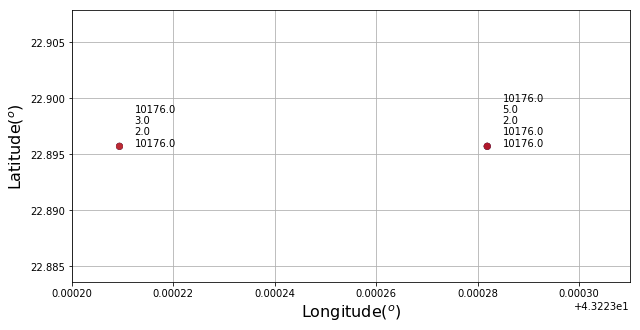

In [16]:
# Plotando Lon, Lat e Grav
fig,(ax1) = plt.subplots(1,1) # 1 curva = 1 subplot
fig.set_size_inches(10, 5) # tamanho da figura | polegadas
ax1 = plt.scatter(data_final.Long, data_final.Lat, c=data_final.Grav, cmap='RdBu_r')
plt.xlabel('Longitude($^o$)', fontsize=16)
plt.ylabel('Latitude($^o$)', fontsize=16)
plt.xlim(43.2232, 43.22331)

# A forma que os nomes das estação foram acrescentadas abaixo, não pode ser usada para dados num geral
# Essa forma foi pensada para o caso particular do dado tratado aqui
for i in range (len(data_final)): # plotando o nome de cada estação junto com seu respectivo ponto
    if i == 0:
        a = 0
        plt.text(data_final.Long[i] + 0.000003, data_final.Lat[i] + a, station[i])
    else:
        if data_final.Long[i] == data_final.Long[i - 1]:
            a = a + 0.001
            plt.text(data_final.Long[i] + 0.000003, data_final.Lat[i] + a, station[i])
        else:
            a = 0
            plt.text(data_final.Long[i] + 0.000003, data_final.Lat[i] + a, station[i])

plt.grid()
plt.show()

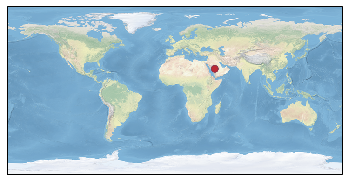

In [30]:
# Plotando Lon, Lat e Grav mas agora, georeferenciado
ax = plt.axes(projection=ctp.PlateCarree())
ax.stock_img()

plt.scatter(data_final.Long, data_final.Lat, c=data_final.Grav, cmap='RdBu_r')
#ax.set_extent([43, 43.3, 22.8, 23])

plt.show()